In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Original 24h Baseline Dataset

In [2]:
dataset = pd.read_pickle('baseline_dataset.gz')
pd.set_option("display.max.columns", None)
dataset.head()

,MM,DD,HH,LOW_IMPACT,MID_IMPACT,BIG_IMPACT,DIRECT_STRIKE,00LAT,00LON,00WIND,06LAT,06LON,06WIND,12LAT,12LON,12WIND,18LAT,18LON,18WIND,24LAT,24LON,24WIND
0,4,20,12,False,False,False,False,9.8,158.800003,45,9.7,159.300003,40,9.6,159.699997,35,9.6,159.899994,30,9.5,160.300003,25
1,4,20,18,False,False,False,False,9.8,158.300003,45,9.8,158.800003,45,9.7,159.300003,40,9.6,159.699997,35,9.6,159.899994,30
2,4,21,0,False,False,False,False,9.8,157.899994,50,9.8,158.300003,45,9.8,158.800003,45,9.7,159.300003,40,9.6,159.699997,35
3,4,21,6,False,False,False,False,9.9,157.399994,50,9.8,157.899994,50,9.8,158.300003,45,9.8,158.800003,45,9.7,159.300003,40
4,4,21,12,False,False,False,False,10.0,157.000000,50,9.9,157.399994,50,9.8,157.899994,50,9.8,158.300003,45,9.8,158.800003,45


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45293 entries, 0 to 45292
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MM             45293 non-null  int64  
 1   DD             45293 non-null  int64  
 2   HH             45293 non-null  int64  
 3   LOW_IMPACT     45293 non-null  bool   
 4   MID_IMPACT     45293 non-null  bool   
 5   BIG_IMPACT     45293 non-null  bool   
 6   DIRECT_STRIKE  45293 non-null  bool   
 7   00LAT          45293 non-null  float32
 8   00LON          45293 non-null  float32
 9   00WIND         45293 non-null  int32  
 10  06LAT          45293 non-null  float32
 11  06LON          45293 non-null  float32
 12  06WIND         45293 non-null  int32  
 13  12LAT          45293 non-null  float32
 14  12LON          45293 non-null  float32
 15  12WIND         45293 non-null  int32  
 16  18LAT          45293 non-null  float32
 17  18LON          45293 non-null  float32
 18  18WIND

In [4]:
dataset.describe()

,MM,DD,HH,00LAT,00LON,00WIND,06LAT,06LON,06WIND,12LAT,12LON,12WIND,18LAT,18LON,18WIND,24LAT,24LON,24WIND
count,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000
mean,8.283068,16.061025,8.918111,20.017653,132.009323,62.021063,19.506798,132.481476,62.087077,19.018631,132.967087,61.773122,18.551769,133.451675,61.072020,18.104473,133.910690,60.020864
std,2.310187,8.633509,6.698948,7.507561,19.457451,31.469743,7.243189,18.568924,31.423058,7.016464,17.948254,31.615497,6.824604,17.685791,31.978523,6.662520,17.910883,32.433757
min,1.000000,1.000000,0.000000,1.300000,-179.899994,10.000000,1.300000,-179.899994,10.000000,1.300000,-179.899994,10.000000,1.300000,-179.899994,10.000000,1.300000,-180.000000,10.000000
25%,7.000000,9.000000,0.000000,14.500000,121.800003,35.000000,14.200000,122.400002,35.000000,13.900000,123.000000,35.000000,13.600000,123.500000,35.000000,13.200000,124.000000,35.000000
50%,8.000000,16.000000,6.000000,19.200001,131.300003,55.000000,18.799999,131.600006,55.000000,18.400000,132.000000,55.000000,18.000000,132.399994,55.000000,17.600000,132.800003,55.000000
75%,10.000000,23.000000,12.000000,24.700001,142.399994,80.000000,24.100000,142.699997,80.000000,23.500000,143.000000,80.000000,22.900000,143.399994,80.000000,22.299999,143.899994,80.000000
max,12.000000,31.000000,23.000000,55.500000,180.000000,185.000000,54.500000,180.000000,185.000000,53.500000,180.000000,185.000000,52.000000,180.000000,185.000000,50.500000,180.000000,185.000000


4054
3131
1193
843


<AxesSubplot:title={'center':'Count of different TC impact categories'}>

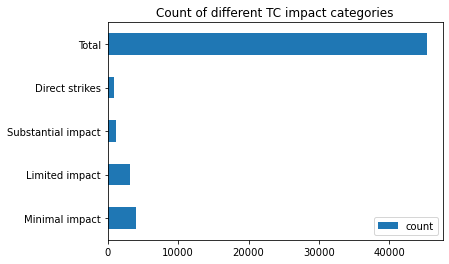

In [5]:
low_impact_count = pd.value_counts(dataset['LOW_IMPACT'])[1]
print(low_impact_count)
mid_impact_count = pd.value_counts(dataset['MID_IMPACT'])[1]
print(mid_impact_count)
big_impact_count = pd.value_counts(dataset['BIG_IMPACT'])[1]
print(big_impact_count)
direct_strike_count = pd.value_counts(dataset['DIRECT_STRIKE'])[1]
print(direct_strike_count)

fig, ax = plt.subplots()
df = pd.DataFrame([low_impact_count, mid_impact_count, big_impact_count, direct_strike_count, dataset.shape[0]])
df = df.rename(index={0:'Minimal impact', 1:'Limited impact', 2:'Substantial impact', 3:'Direct strikes', 4:'Total'}, columns={0: 'count'})
df.plot(ax=ax, kind='barh', title='Count of different TC impact categories')

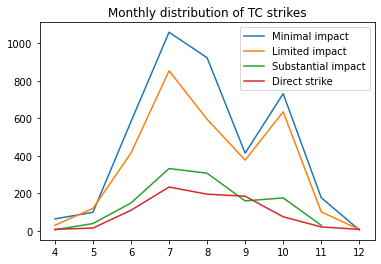

In [6]:
# T1
df = dataset.query('LOW_IMPACT == True')
df = df.groupby(['MM']).count()['LOW_IMPACT']
plt.plot(df, label='Minimal impact')
# T3
df = dataset.query('MID_IMPACT == True')
df = df.groupby(['MM']).count()['MID_IMPACT']
plt.plot(df, label='Limited impact')
# T8 or plus
df = dataset.query('BIG_IMPACT == True')
df = df.groupby(['MM']).count()['BIG_IMPACT']
plt.plot(df, label='Substantial impact')
# Direct strike
df = dataset.query('DIRECT_STRIKE == True')
df = df.groupby(['MM']).count()['DIRECT_STRIKE']
plt.plot(df, label='Direct strike')
# show plot
plt.title('Monthly distribution of TC strikes')
plt.legend()
plt.show()

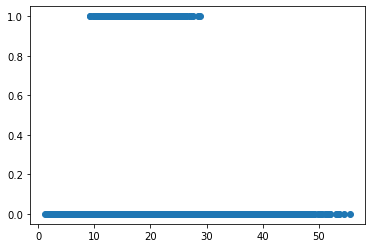

In [11]:
y = dataset["LOW_IMPACT"].to_numpy(dtype=int)
x = dataset["00LAT"]
plt.scatter(x, y)

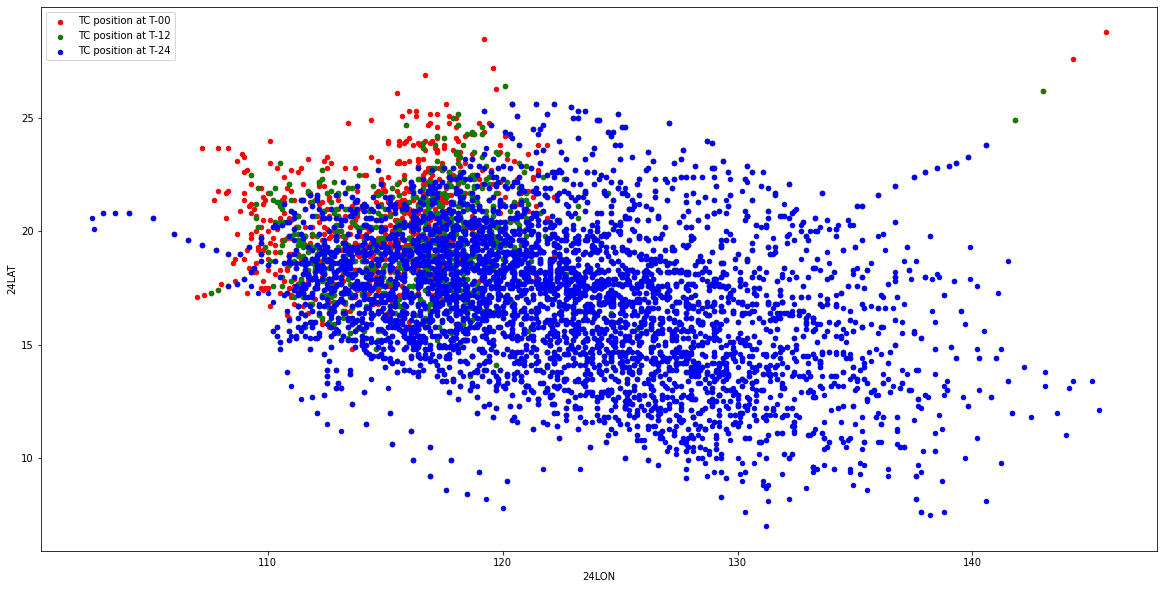

In [6]:
df = dataset.query('LOW_IMPACT == True')
ax1 = df.plot(kind='scatter', y='00LAT', x='00LON', label='TC position at T-00', color='r', figsize=(20,10))
ax2 = df.plot(kind='scatter', y='12LAT', x='12LON', label='TC position at T-12', color='g', ax=ax1)
ax3 = df.plot(kind='scatter', y='24LAT', x='24LON', label='TC position at T-24', color='b', ax=ax1)
plt.legend()
plt.show()

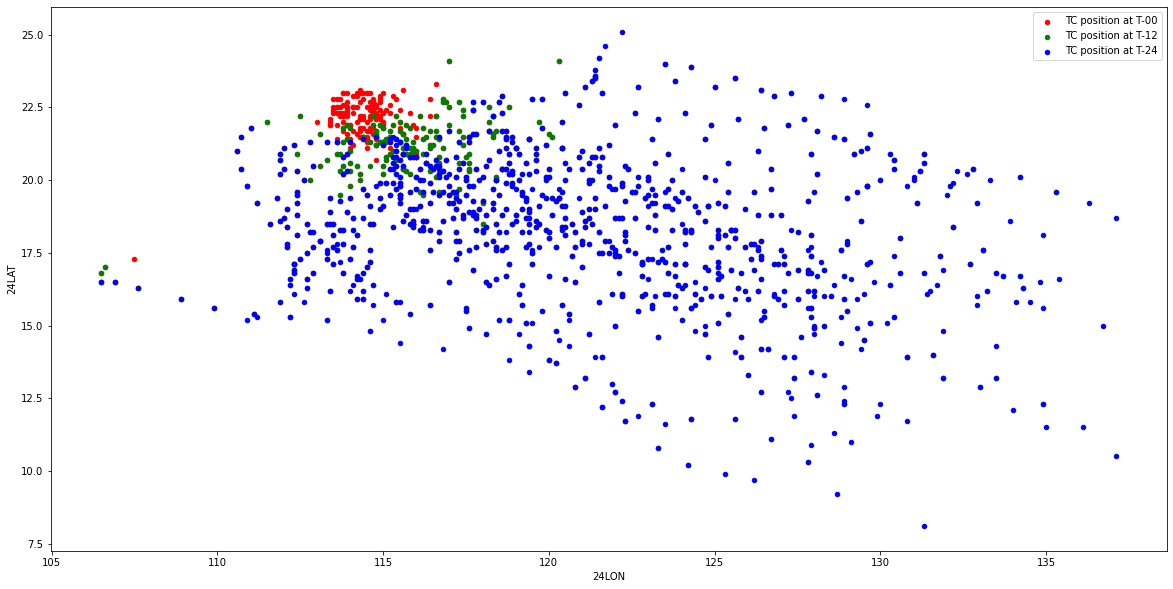

In [7]:
df = dataset.query('DIRECT_STRIKE == True')
ax1 = df.plot(kind='scatter', y='00LAT', x='00LON', label='TC position at T-00', color='r', figsize=(20,10))
ax2 = df.plot(kind='scatter', y='12LAT', x='12LON', label='TC position at T-12', color='g', ax=ax1)
ax3 = df.plot(kind='scatter', y='24LAT', x='24LON', label='TC position at T-24', color='b', ax=ax1)
plt.legend()
plt.show()

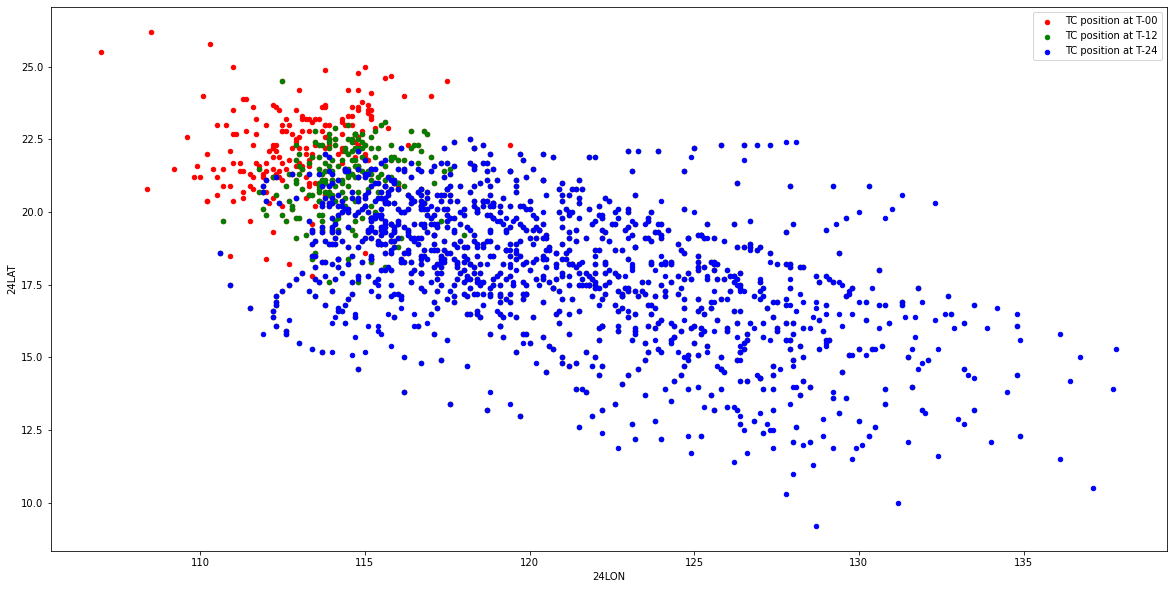

In [8]:
df = dataset.query('BIG_IMPACT == True')
ax1 = df.plot(kind='scatter', y='00LAT', x='00LON', label='TC position at T-00', color='r', figsize=(20,10))
ax2 = df.plot(kind='scatter', y='12LAT', x='12LON', label='TC position at T-12', color='g', ax=ax1)
ax3 = df.plot(kind='scatter', y='24LAT', x='24LON', label='TC position at T-24', color='b', ax=ax1)
plt.legend()
plt.show()

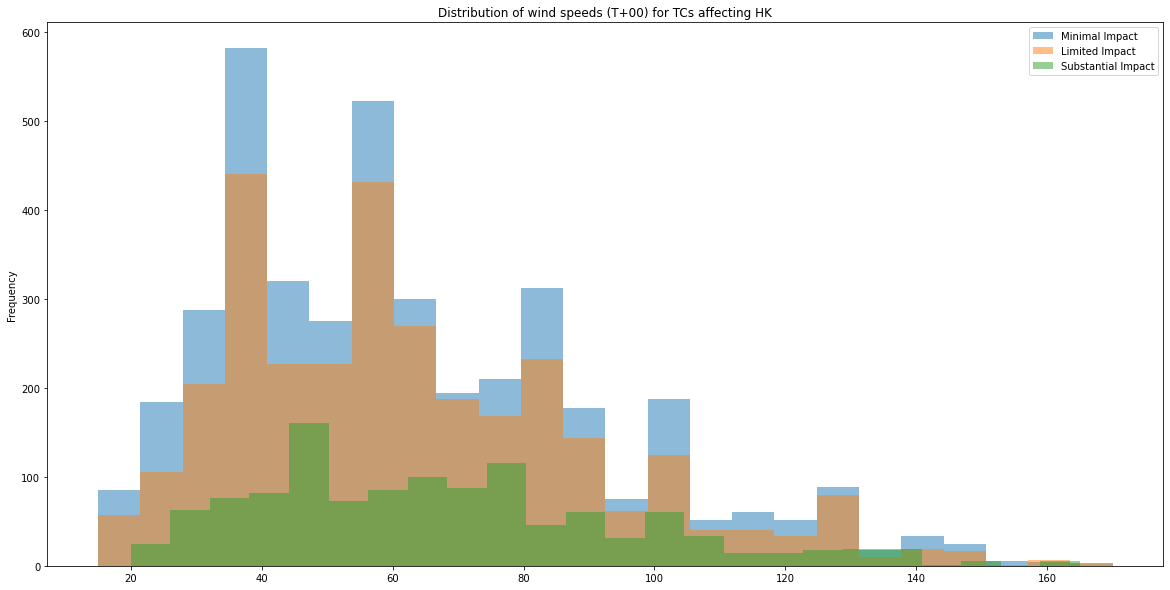

In [9]:
# dataset.drop(dataset[dataset["00WIND"] < 0].index, inplace=True)

df = dataset.query('LOW_IMPACT == True')['00WIND']
ax1 = df.plot.hist(by='00WIND', bins=24, alpha=0.5, label='Minimal Impact', figsize=(20,10), title='Distribution of wind speeds (T+00) for TCs affecting HK')
df = dataset.query('MID_IMPACT == True')['00WIND']
ax2 = df.plot.hist(by='00WIND', bins=24, alpha=0.5, label='Limited Impact', ax=ax1)
df = dataset.query('BIG_IMPACT == True')['00WIND']
ax3 = df.plot.hist(by='00WIND', bins=24, alpha=0.5, label='Substantial Impact', ax=ax1)
plt.legend()
plt.show()

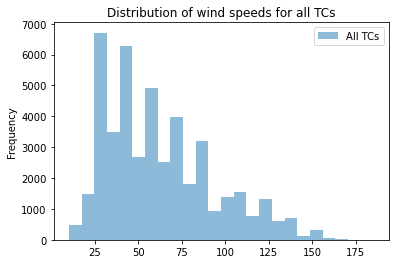

In [10]:
df = dataset['00WIND']
ax1 = df.plot.hist(by='00WIND', bins=24, alpha=0.5, label='All TCs', title='Distribution of wind speeds for all TCs')
plt.legend()
plt.show()

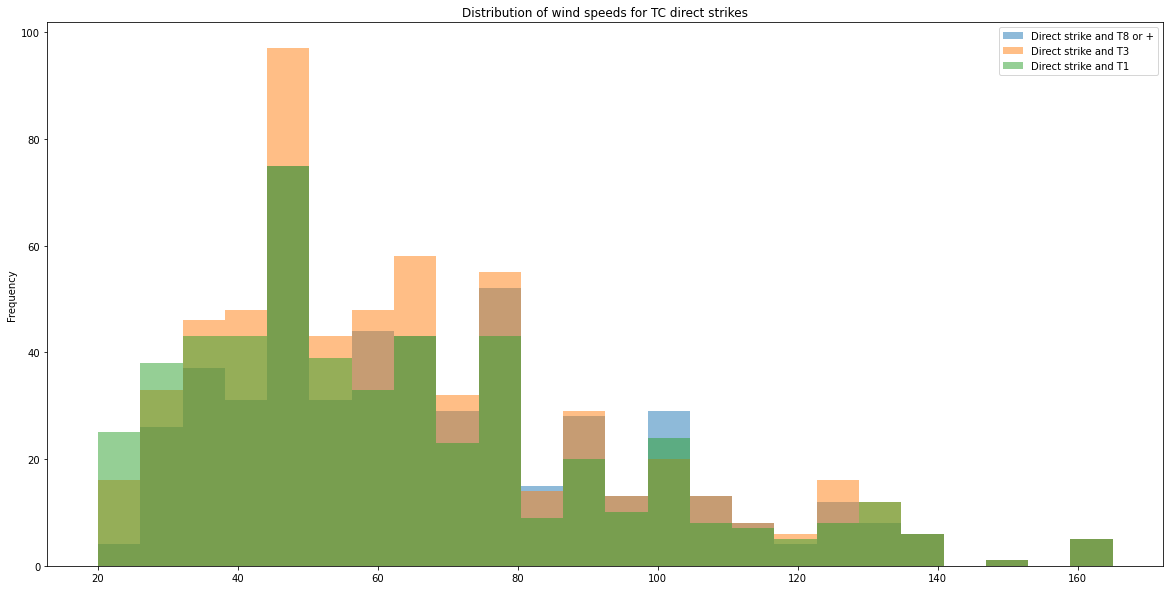

In [12]:
df = dataset.query('DIRECT_STRIKE == True and BIG_IMPACT == True')['00WIND']
ax1 = df.plot.hist(by='00WIND', bins=24, alpha=0.5, label='Direct strike and T8 or +', figsize=(20,10), title='Distribution of wind speeds for TC direct strikes')
df = dataset.query('DIRECT_STRIKE == True and MID_IMPACT == True')['00WIND']
ax2 = df.plot.hist(by='00WIND', bins=24, alpha=0.5, label='Direct strike and T3', ax=ax1)
df = dataset.query('DIRECT_STRIKE == True and LOW_IMPACT == True')['00WIND']
ax3 = df.plot.hist(by='00WIND', bins=24, alpha=0.5, label='Direct strike and T1', ax=ax1)
plt.legend()
plt.show()

<AxesSubplot:xlabel='00WIND', ylabel='Count'>

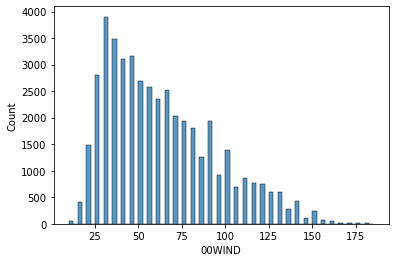

In [8]:
sns.histplot(dataset['00WIND'])

<AxesSubplot:xlabel='00LAT', ylabel='Count'>

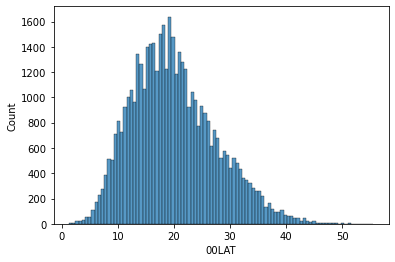

In [9]:
sns.histplot(dataset['00LAT'])

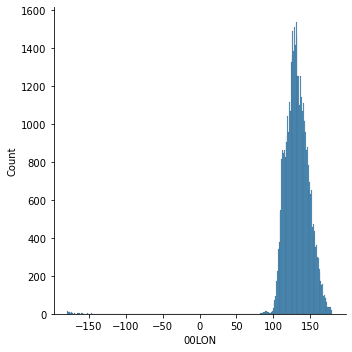

In [10]:
sns.displot(dataset['00LON'])

D:\kcfon\anaconda3\envs\efyp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='MM'>

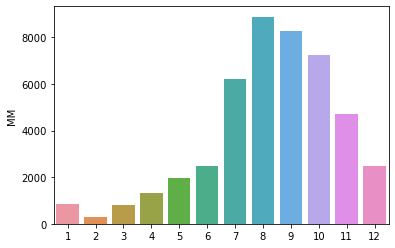

In [11]:
months = dataset['MM']
count_months = months.value_counts()
sns.barplot(count_months.index, count_months)

In [4]:
# null checking: before null fixes
dataset[dataset.isnull().any(axis=1)]

,MM,DD,HH,LOW_IMPACT,MID_IMPACT,BIG_IMPACT,DIRECT_STRIKE,00LAT,00LON,00WIND,06LAT,06LON,06WIND,12LAT,12LON,12WIND,18LAT,18LON,18WIND,24LAT,24LON,24WIND
5304,11,13,12,False,False,False,False,14.3,138.899994,65.0,13.6,140.100006,60.0,13.0,141.500000,55.0,12.4,142.899994,50.0,NaN,NaN,NaN
5305,11,13,18,False,False,False,False,14.3,138.899994,65.0,13.6,140.100006,60.0,13.0,141.500000,55.0,NaN,NaN,NaN,NaN,NaN,NaN
5306,11,14,0,False,False,False,False,15.0,132.000000,80.0,14.3,138.899994,65.0,13.6,140.100006,60.0,NaN,NaN,NaN,NaN,NaN,NaN
5307,11,14,6,False,False,False,False,15.7,129.899994,80.0,15.0,132.000000,80.0,14.3,138.899994,65.0,NaN,NaN,NaN,NaN,NaN,NaN
5308,11,14,12,False,False,False,False,16.4,127.699997,80.0,15.7,129.899994,80.0,15.0,132.000000,80.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593,9,6,12,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14804,10,16,0,False,False,False,False,15.6,170.100006,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14805,10,16,6,False,False,False,False,15.7,169.600006,35.0,15.6,170.100006,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14806,10,16,12,False,False,False,False,15.8,169.000000,35.0,15.7,169.600006,35.0,15.6,170.100006,30.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# after fixes done
dataset[dataset.isnull().any(axis=1)]

,MM,DD,HH,LOW_IMPACT,MID_IMPACT,BIG_IMPACT,DIRECT_STRIKE,00LAT,00LON,00WIND,06LAT,06LON,06WIND,12LAT,12LON,12WIND,18LAT,18LON,18WIND,24LAT,24LON,24WIND


### 48-h Baseline Dataset
time series of LON, LAT, WIND extended to 48h.

In [5]:
dataset48 = pd.read_pickle('baseline_dataset_48.gz')
pd.set_option("display.max.columns", None)
dataset48.head()

,MM,DD,HH,LOW_IMPACT,MID_IMPACT,BIG_IMPACT,DIRECT_STRIKE,00LAT,00LON,00VMAX,06LAT,06LON,06VMAX,12LAT,12LON,12VMAX,18LAT,18LON,18VMAX,24LAT,24LON,24VMAX,30LAT,30LON,30VMAX,36LAT,36LON,36VMAX,42LAT,42LON,42VMAX,48LAT,48LON,48VMAX
0,4,21,12,False,False,False,False,10.0,157.000000,50,9.9,157.399994,50,9.8,157.899994,50,9.8,158.300003,45,9.8,158.800003,45,9.7,159.300003,40,9.6,159.699997,35,9.6,159.899994,30,9.5,160.300003,25
1,4,21,18,False,False,False,False,10.0,156.500000,40,10.0,157.000000,50,9.9,157.399994,50,9.8,157.899994,50,9.8,158.300003,45,9.8,158.800003,45,9.7,159.300003,40,9.6,159.699997,35,9.6,159.899994,30
2,4,22,0,False,False,False,False,10.1,155.800003,40,10.0,156.500000,40,10.0,157.000000,50,9.9,157.399994,50,9.8,157.899994,50,9.8,158.300003,45,9.8,158.800003,45,9.7,159.300003,40,9.6,159.699997,35
3,4,22,6,False,False,False,False,10.2,155.100006,35,10.1,155.800003,40,10.0,156.500000,40,10.0,157.000000,50,9.9,157.399994,50,9.8,157.899994,50,9.8,158.300003,45,9.8,158.800003,45,9.7,159.300003,40
4,4,22,12,False,False,False,False,10.2,154.500000,35,10.2,155.100006,35,10.1,155.800003,40,10.0,156.500000,40,10.0,157.000000,50,9.9,157.399994,50,9.8,157.899994,50,9.8,158.300003,45,9.8,158.800003,45


In [6]:
dataset48[dataset48.isnull().any(axis=1)]

,MM,DD,HH,LOW_IMPACT,MID_IMPACT,BIG_IMPACT,DIRECT_STRIKE,00LAT,00LON,00VMAX,06LAT,06LON,06VMAX,12LAT,12LON,12VMAX,18LAT,18LON,18VMAX,24LAT,24LON,24VMAX,30LAT,30LON,30VMAX,36LAT,36LON,36VMAX,42LAT,42LON,42VMAX,48LAT,48LON,48VMAX


In [7]:
dataset48.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37413 entries, 0 to 37412
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MM             37413 non-null  int64  
 1   DD             37413 non-null  int64  
 2   HH             37413 non-null  int64  
 3   LOW_IMPACT     37413 non-null  bool   
 4   MID_IMPACT     37413 non-null  bool   
 5   BIG_IMPACT     37413 non-null  bool   
 6   DIRECT_STRIKE  37413 non-null  bool   
 7   00LAT          37413 non-null  float32
 8   00LON          37413 non-null  float32
 9   00VMAX         37413 non-null  int32  
 10  06LAT          37413 non-null  float32
 11  06LON          37413 non-null  float32
 12  06VMAX         37413 non-null  int32  
 13  12LAT          37413 non-null  float32
 14  12LON          37413 non-null  float32
 15  12VMAX         37413 non-null  int32  
 16  18LAT          37413 non-null  float32
 17  18LON          37413 non-null  float32
 18  18VMAX

In [8]:
dataset48.describe()

,MM,DD,HH,00LAT,00LON,00VMAX,06LAT,06LON,06VMAX,12LAT,12LON,12VMAX,18LAT,18LON,18VMAX,24LAT,24LON,24VMAX,30LAT,30LON,30VMAX,36LAT,36LON,36VMAX,42LAT,42LON,42VMAX,48LAT,48LON,48VMAX
count,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000,37413.000000
mean,8.307460,16.141956,8.906476,20.829992,131.234741,66.018764,20.296738,131.694992,66.701681,19.788368,132.158752,66.933152,19.303188,132.628510,66.706225,18.839369,133.124344,66.063133,18.394747,133.639816,65.012963,17.966516,134.196838,63.647395,17.553280,134.743256,62.010932,17.154165,135.243896,60.152086
std,2.308149,8.639211,6.698274,7.544353,19.358662,32.016830,7.258754,18.114910,31.646577,7.013615,17.249699,31.547357,6.805069,16.745399,31.674468,6.627823,16.395668,31.952520,6.477647,16.218370,32.318864,6.350013,15.971780,32.711952,6.243334,16.059397,33.096395,6.153492,16.708906,33.437094
min,1.000000,1.000000,0.000000,1.900000,-179.899994,10.000000,1.800000,-179.899994,10.000000,1.600000,-179.899994,10.000000,1.300000,-179.899994,10.000000,1.300000,-179.899994,10.000000,1.300000,-179.800003,10.000000,1.300000,-179.800003,10.000000,1.300000,-179.800003,10.000000,1.300000,-180.000000,10.000000
25%,7.000000,9.000000,0.000000,15.300000,121.300003,40.000000,15.000000,121.800003,40.000000,14.700000,122.300003,40.000000,14.300000,122.900002,40.000000,14.000000,123.500000,40.000000,13.700000,124.000000,40.000000,13.400000,124.599998,35.000000,13.000000,125.099998,35.000000,12.700000,125.599998,30.000000
50%,9.000000,17.000000,6.000000,20.000000,130.600006,60.000000,19.500000,130.899994,60.000000,19.200001,131.199997,60.000000,18.700001,131.500000,60.000000,18.299999,131.899994,60.000000,17.900000,132.399994,60.000000,17.500000,132.800003,55.000000,17.100000,133.399994,55.000000,16.700001,134.000000,50.000000
75%,10.000000,23.000000,12.000000,25.600000,141.500000,90.000000,25.000000,141.600006,90.000000,24.400000,141.899994,90.000000,23.799999,142.199997,90.000000,23.100000,142.600006,90.000000,22.600000,143.000000,85.000000,22.000000,143.600006,85.000000,21.500000,144.199997,85.000000,21.000000,144.800003,80.000000
max,12.000000,31.000000,23.000000,55.500000,180.000000,185.000000,54.500000,180.000000,185.000000,53.500000,180.000000,185.000000,52.000000,180.000000,185.000000,50.500000,180.000000,185.000000,50.299999,180.000000,185.000000,50.299999,180.000000,185.000000,50.299999,180.000000,185.000000,50.299999,180.000000,185.000000


3290
2713
1044
709


<AxesSubplot:title={'center':'Count of different TC impact categories'}>

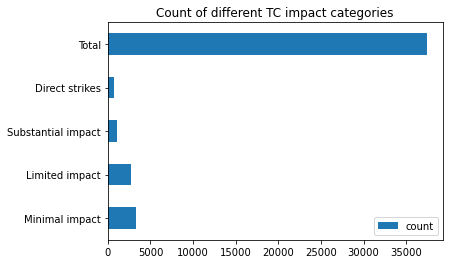

In [10]:
low_impact_count = pd.value_counts(dataset48['LOW_IMPACT'])[1]
print(low_impact_count)
mid_impact_count = pd.value_counts(dataset48['MID_IMPACT'])[1]
print(mid_impact_count)
big_impact_count = pd.value_counts(dataset48['BIG_IMPACT'])[1]
print(big_impact_count)
direct_strike_count = pd.value_counts(dataset48['DIRECT_STRIKE'])[1]
print(direct_strike_count)

fig, ax = plt.subplots()
df = pd.DataFrame([low_impact_count, mid_impact_count, big_impact_count, direct_strike_count, dataset48.shape[0]])
df = df.rename(index={0:'Minimal impact', 1:'Limited impact', 2:'Substantial impact', 3:'Direct strikes', 4:'Total'}, columns={0: 'count'})
df.plot(ax=ax, kind='barh', title='Count of different TC impact categories')

### With Revised Variables

```
Columns and data types of the combined set, 9/1/2022:
0 : int MM, d/t of the *last* record in sequence
1 : int DD
2 : bool MINIMAL_IMPACT, T1 ground truth
3 : bool LIMITED_IMPACT, T3 ground truth
4 : bool SUBSTANTIAL_IMPACT, T8-T10 ground truth
5 : bool DIRECT_STRIKE, 100km range reached
6+ : a time series of length = (past_track_limit // 6). Each item in the series is a six-tuple
       (float DISTxx, float AZMxx, int SPEEDxx, int DIRxx, int VMAXxx, int DVMAXxx)
     indicating the radial distance and azimuth of the storm from TC, storm speed, storm heading bearing,
     storm intensity and the change in storm intensity. DVMAX${past_track_limit} is not available.
     The symbol xx stands for the number of hours behind the start of the sequence,
     i.e. xx in [0, 6, ..., past_track_limit]
```
     
past_track_limit was chosen to be 24 so that it is comparable to the original dataset.

In [2]:
dataset_mk2 = pd.read_pickle('baseline_dataset_newvars.gz')
pd.set_option("display.max.columns", None)
dataset_mk2.head()

,MM,DD,LOW_IMPACT,MID_IMPACT,BIG_IMPACT,DIRECT_STRIKE,DIST00,AZM00,SPEED00,DIR00,VMAX00,DVMAX00,DIST06,AZM06,SPEED06,DIR06,VMAX06,DVMAX06,DIST12,AZM12,SPEED12,DIR12,VMAX12,DVMAX12,DIST18,AZM18,SPEED18,DIR18,VMAX18,DVMAX18,DIST24,AZM24,SPEED24,DIR24,VMAX24
0,4,20,False,False,False,False,4950.716295,98.825315,5,276,45,5,5005.752738,98.695631,5,284,40,5,5050.616284,98.618628,3,280,35,5,5070.994409,98.515635,3,278,30,5,5115.874185,98.439586,4,284,25
1,4,20,False,False,False,False,4899.823633,99.088943,4,268,45,0,4950.716295,98.825315,5,276,45,5,5005.752738,98.695631,5,284,40,5,5050.616284,98.618628,3,280,35,5,5070.994409,98.515635,3,278,30
2,4,21,False,False,False,False,4859.135633,99.302290,4,276,50,5,4899.823633,99.088943,4,268,45,0,4950.716295,98.825315,5,276,45,5,5005.752738,98.695631,5,284,40,5,5050.616284,98.618628,3,280,35
3,4,21,False,False,False,False,4804.149970,99.437503,5,284,50,0,4859.135633,99.302290,4,276,50,5,4899.823633,99.088943,4,268,45,0,4950.716295,98.825315,5,276,45,5,5005.752738,98.695631,5,284,40
4,4,21,False,False,False,False,4759.344065,99.519479,4,277,50,0,4804.149970,99.437503,5,284,50,0,4859.135633,99.302290,4,276,50,5,4899.823633,99.088943,4,268,45,0,4950.716295,98.825315,5,276,45


In [3]:
dataset_mk2[dataset_mk2.isnull().any(axis=1)]

,MM,DD,LOW_IMPACT,MID_IMPACT,BIG_IMPACT,DIRECT_STRIKE,DIST00,AZM00,SPEED00,DIR00,VMAX00,DIST06,AZM06,SPEED06,DIR06,VMAX06,DVMAX06,DIST12,AZM12,SPEED12,DIR12,VMAX12,DVMAX12,DIST18,AZM18,SPEED18,DIR18,VMAX18,DVMAX18,DIST24,AZM24,SPEED24,DIR24,VMAX24,DVMAX24


In [4]:
dataset_mk2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45293 entries, 0 to 45292
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MM             45293 non-null  int64  
 1   DD             45293 non-null  int64  
 2   LOW_IMPACT     45293 non-null  bool   
 3   MID_IMPACT     45293 non-null  bool   
 4   BIG_IMPACT     45293 non-null  bool   
 5   DIRECT_STRIKE  45293 non-null  bool   
 6   DIST00         45293 non-null  float64
 7   AZM00          45293 non-null  float64
 8   SPEED00        45293 non-null  int32  
 9   DIR00          45293 non-null  int32  
 10  VMAX00         45293 non-null  int32  
 11  DIST06         45293 non-null  float64
 12  AZM06          45293 non-null  float64
 13  SPEED06        45293 non-null  int32  
 14  DIR06          45293 non-null  int32  
 15  VMAX06         45293 non-null  int32  
 16  DVMAX06        45293 non-null  int32  
 17  DIST12         45293 non-null  float64
 18  AZM12 

In [5]:
dataset_mk2.describe()

,MM,DD,DIST00,AZM00,SPEED00,DIR00,VMAX00,DIST06,AZM06,SPEED06,DIR06,VMAX06,DVMAX06,DIST12,AZM12,SPEED12,DIR12,VMAX12,DVMAX12,DIST18,AZM18,SPEED18,DIR18,VMAX18,DVMAX18,DIST24,AZM24,SPEED24,DIR24,VMAX24,DVMAX24
count,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000
mean,8.283068,16.061025,2218.393825,109.267926,10.684742,225.715431,62.021063,2241.654732,109.073231,10.349900,230.140949,62.087077,-0.066015,2273.417463,108.957525,10.073212,234.390215,61.773122,0.313956,2312.893884,108.896300,9.840461,238.288786,61.072020,0.701102,2358.906077,108.845233,9.682953,241.543594,60.020864,1.051156
std,2.310187,8.633509,1342.567603,50.763196,6.124170,117.951445,31.469743,1343.384842,47.521173,5.578205,115.956029,31.423058,7.172141,1348.363800,44.470672,5.151693,113.711839,31.615497,7.034810,1356.366855,41.688113,4.845405,111.327622,31.978523,6.829256,1366.113151,39.153335,4.679197,108.984489,32.433757,6.631096
min,1.000000,1.000000,7.694885,0.786390,0.000000,0.000000,10.000000,7.694885,0.786390,0.000000,0.000000,10.000000,-70.000000,7.694885,0.786390,0.000000,0.000000,10.000000,-70.000000,7.694885,1.592406,0.000000,0.000000,10.000000,-70.000000,7.694885,1.592406,0.000000,0.000000,10.000000,-70.000000
25%,7.000000,9.000000,1159.492088,77.159187,7.000000,80.000000,35.000000,1185.229028,79.113975,7.000000,108.000000,35.000000,-5.000000,1215.307553,81.137308,6.000000,200.000000,35.000000,-5.000000,1251.058784,82.976222,6.000000,234.000000,35.000000,0.000000,1291.440126,84.631085,6.000000,245.000000,35.000000,0.000000
50%,8.000000,16.000000,1983.984708,98.819589,10.000000,282.000000,55.000000,2011.275554,99.606990,10.000000,283.000000,55.000000,0.000000,2041.528946,100.268864,9.000000,284.000000,55.000000,0.000000,2080.751597,100.878911,9.000000,285.000000,55.000000,0.000000,2132.963109,101.501683,9.000000,286.000000,55.000000,0.000000
75%,10.000000,23.000000,3071.167266,121.190621,13.000000,308.000000,80.000000,3095.008106,120.730840,13.000000,308.000000,80.000000,5.000000,3130.993586,120.286155,13.000000,309.000000,80.000000,5.000000,3179.323402,119.868589,13.000000,309.000000,80.000000,5.000000,3232.963736,119.514606,12.000000,309.000000,80.000000,5.000000
max,12.000000,31.000000,9074.050220,359.279611,93.000000,360.000000,185.000000,8901.524375,359.279611,71.000000,360.000000,185.000000,50.000000,8781.259577,359.145106,71.000000,360.000000,185.000000,50.000000,8650.501078,359.145106,59.000000,360.000000,185.000000,50.000000,8388.523192,359.145106,61.000000,360.000000,185.000000,50.000000


4054
3131
1193
843


<AxesSubplot:title={'center':'Count of different TC impact categories'}>

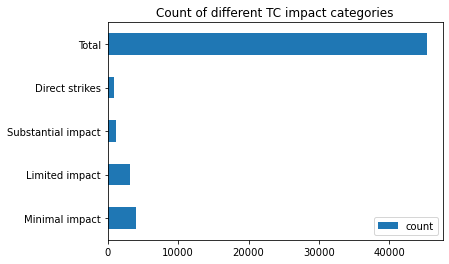

In [6]:
low_impact_count = pd.value_counts(dataset_mk2['LOW_IMPACT'])[1]
print(low_impact_count)
mid_impact_count = pd.value_counts(dataset_mk2['MID_IMPACT'])[1]
print(mid_impact_count)
big_impact_count = pd.value_counts(dataset_mk2['BIG_IMPACT'])[1]
print(big_impact_count)
direct_strike_count = pd.value_counts(dataset_mk2['DIRECT_STRIKE'])[1]
print(direct_strike_count)

fig, ax = plt.subplots()
df = pd.DataFrame([low_impact_count, mid_impact_count, big_impact_count, direct_strike_count, dataset_mk2.shape[0]])
df = df.rename(index={0:'Minimal impact', 1:'Limited impact', 2:'Substantial impact', 3:'Direct strikes', 4:'Total'}, columns={0: 'count'})
df.plot(ax=ax, kind='barh', title='Count of different TC impact categories')

### As Time Series

In [2]:
dataset_ts = pd.read_pickle('baseline_dataset_ts_24.gz')
pd.set_option("display.max.columns", None)
dataset_ts.head()

,LOW_IMPACT,MID_IMPACT,BIG_IMPACT,DIRECT_STRIKE,MM00,DD00,HH00,MI_STATUS00,LI_STATUS00,SI_STATUS00,DS_STATUS00,LAT00,LON00,VMAX00,MM06,DD06,HH06,MI_STATUS06,LI_STATUS06,SI_STATUS06,DS_STATUS06,LAT06,LON06,VMAX06,MM12,DD12,HH12,MI_STATUS12,LI_STATUS12,SI_STATUS12,DS_STATUS12,LAT12,LON12,VMAX12,MM18,DD18,HH18,MI_STATUS18,LI_STATUS18,SI_STATUS18,DS_STATUS18,LAT18,LON18,VMAX18,MM24,DD24,HH24,MI_STATUS24,LI_STATUS24,SI_STATUS24,DS_STATUS24,LAT24,LON24,VMAX24
0,False,False,False,False,4,20,12,False,False,False,False,9.8,158.800003,45,4,20,6,False,False,False,False,9.7,159.300003,40,4,20,0,False,False,False,False,9.6,159.699997,35,4,19,18,False,False,False,False,9.6,159.899994,30,4,19,12,False,False,False,False,9.5,160.300003,25
1,False,False,False,False,4,20,18,False,False,False,False,9.8,158.300003,45,4,20,12,False,False,False,False,9.8,158.800003,45,4,20,6,False,False,False,False,9.7,159.300003,40,4,20,0,False,False,False,False,9.6,159.699997,35,4,19,18,False,False,False,False,9.6,159.899994,30
2,False,False,False,False,4,21,0,False,False,False,False,9.8,157.899994,50,4,20,18,False,False,False,False,9.8,158.300003,45,4,20,12,False,False,False,False,9.8,158.800003,45,4,20,6,False,False,False,False,9.7,159.300003,40,4,20,0,False,False,False,False,9.6,159.699997,35
3,False,False,False,False,4,21,6,False,False,False,False,9.9,157.399994,50,4,21,0,False,False,False,False,9.8,157.899994,50,4,20,18,False,False,False,False,9.8,158.300003,45,4,20,12,False,False,False,False,9.8,158.800003,45,4,20,6,False,False,False,False,9.7,159.300003,40
4,False,False,False,False,4,21,12,False,False,False,False,10.0,157.000000,50,4,21,6,False,False,False,False,9.9,157.399994,50,4,21,0,False,False,False,False,9.8,157.899994,50,4,20,18,False,False,False,False,9.8,158.300003,45,4,20,12,False,False,False,False,9.8,158.800003,45


In [3]:
dataset_ts[dataset_ts.isnull().any(axis=1)]

,LOW_IMPACT,MID_IMPACT,BIG_IMPACT,DIRECT_STRIKE,MM00,DD00,HH00,MI_STATUS00,LI_STATUS00,SI_STATUS00,DS_STATUS00,LAT00,LON00,VMAX00,MM06,DD06,HH06,MI_STATUS06,LI_STATUS06,SI_STATUS06,DS_STATUS06,LAT06,LON06,VMAX06,MM12,DD12,HH12,MI_STATUS12,LI_STATUS12,SI_STATUS12,DS_STATUS12,LAT12,LON12,VMAX12,MM18,DD18,HH18,MI_STATUS18,LI_STATUS18,SI_STATUS18,DS_STATUS18,LAT18,LON18,VMAX18,MM24,DD24,HH24,MI_STATUS24,LI_STATUS24,SI_STATUS24,DS_STATUS24,LAT24,LON24,VMAX24


In [4]:
dataset_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45293 entries, 0 to 45292
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LOW_IMPACT     45293 non-null  bool   
 1   MID_IMPACT     45293 non-null  bool   
 2   BIG_IMPACT     45293 non-null  bool   
 3   DIRECT_STRIKE  45293 non-null  bool   
 4   MM00           45293 non-null  int32  
 5   DD00           45293 non-null  int32  
 6   HH00           45293 non-null  int32  
 7   MI_STATUS00    45293 non-null  bool   
 8   LI_STATUS00    45293 non-null  bool   
 9   SI_STATUS00    45293 non-null  bool   
 10  DS_STATUS00    45293 non-null  bool   
 11  LAT00          45293 non-null  float32
 12  LON00          45293 non-null  float32
 13  VMAX00         45293 non-null  int32  
 14  MM06           45293 non-null  int32  
 15  DD06           45293 non-null  int32  
 16  HH06           45293 non-null  int32  
 17  MI_STATUS06    45293 non-null  bool   
 18  LI_STA

In [5]:
dataset_ts.describe()

,MM00,DD00,HH00,LAT00,LON00,VMAX00,MM06,DD06,HH06,LAT06,LON06,VMAX06,MM12,DD12,HH12,LAT12,LON12,VMAX12,MM18,DD18,HH18,LAT18,LON18,VMAX18,MM24,DD24,HH24,LAT24,LON24,VMAX24
count,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000,45293.000000
mean,8.283068,16.061025,8.918111,20.017653,132.009323,62.021063,8.277548,16.040183,9.004349,19.506798,132.481476,62.087077,8.272426,16.016868,9.058398,19.018631,132.967087,61.773122,8.266531,15.987327,9.045548,18.551769,133.451675,61.072020,8.260945,15.961341,8.915837,18.104473,133.910690,60.020864
std,2.310187,8.633509,6.698948,7.507561,19.457451,31.469743,2.308859,8.627138,6.740402,7.243189,18.568924,31.423058,2.307250,8.621447,6.718091,7.016464,17.948254,31.615497,2.306335,8.615749,6.677219,6.824604,17.685791,31.978523,2.305208,8.611649,6.699363,6.662520,17.910883,32.433757
min,1.000000,1.000000,0.000000,1.300000,-179.899994,10.000000,1.000000,1.000000,0.000000,1.300000,-179.899994,10.000000,1.000000,1.000000,0.000000,1.300000,-179.899994,10.000000,1.000000,1.000000,0.000000,1.300000,-179.899994,10.000000,1.000000,1.000000,0.000000,1.300000,-180.000000,10.000000
25%,7.000000,9.000000,0.000000,14.500000,121.800003,35.000000,7.000000,9.000000,0.000000,14.200000,122.400002,35.000000,7.000000,9.000000,6.000000,13.900000,123.000000,35.000000,7.000000,9.000000,6.000000,13.600000,123.500000,35.000000,7.000000,9.000000,0.000000,13.200000,124.000000,35.000000
50%,8.000000,16.000000,6.000000,19.200001,131.300003,55.000000,8.000000,16.000000,6.000000,18.799999,131.600006,55.000000,8.000000,16.000000,12.000000,18.400000,132.000000,55.000000,8.000000,16.000000,12.000000,18.000000,132.399994,55.000000,8.000000,16.000000,6.000000,17.600000,132.800003,55.000000
75%,10.000000,23.000000,12.000000,24.700001,142.399994,80.000000,10.000000,23.000000,18.000000,24.100000,142.699997,80.000000,10.000000,23.000000,18.000000,23.500000,143.000000,80.000000,10.000000,23.000000,12.000000,22.900000,143.399994,80.000000,10.000000,23.000000,12.000000,22.299999,143.899994,80.000000
max,12.000000,31.000000,23.000000,55.500000,180.000000,185.000000,12.000000,31.000000,23.000000,54.500000,180.000000,185.000000,12.000000,31.000000,23.000000,53.500000,180.000000,185.000000,12.000000,31.000000,23.000000,52.000000,180.000000,185.000000,12.000000,31.000000,23.000000,50.500000,180.000000,185.000000


4054
3131
1193
843


<AxesSubplot:title={'center':'Count of different TC impact categories'}>

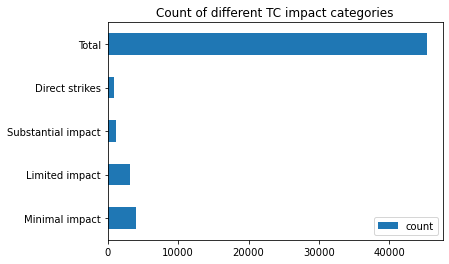

In [6]:
low_impact_count = pd.value_counts(dataset_ts['LOW_IMPACT'])[1]
print(low_impact_count)
mid_impact_count = pd.value_counts(dataset_ts['MID_IMPACT'])[1]
print(mid_impact_count)
big_impact_count = pd.value_counts(dataset_ts['BIG_IMPACT'])[1]
print(big_impact_count)
direct_strike_count = pd.value_counts(dataset_ts['DIRECT_STRIKE'])[1]
print(direct_strike_count)

fig, ax = plt.subplots()
df = pd.DataFrame([low_impact_count, mid_impact_count, big_impact_count, direct_strike_count, dataset_ts.shape[0]])
df = df.rename(index={0:'Minimal impact', 1:'Limited impact', 2:'Substantial impact', 3:'Direct strikes', 4:'Total'}, columns={0: 'count'})
df.plot(ax=ax, kind='barh', title='Count of different TC impact categories')

In [22]:
subset = dataset_ts.query("DIRECT_STRIKE==True")
subset.iloc[92]

LOW_IMPACT             True
MID_IMPACT            False
BIG_IMPACT             True
DIRECT_STRIKE          True
MM00                      9
DD00                     16
HH00                     18
MI_STATUS00            True
LI_STATUS00           False
SI_STATUS00           False
DS_STATUS00           False
LAT00             20.299999
LON00            116.800003
VMAX00                  100
MM06                      9
DD06                     16
HH06                     12
MI_STATUS06            True
LI_STATUS06           False
SI_STATUS06           False
DS_STATUS06           False
LAT06                  20.1
LON06            117.199997
VMAX06                  100
MM12                      9
DD12                     16
HH12                      6
MI_STATUS12           False
LI_STATUS12           False
SI_STATUS12           False
DS_STATUS12           False
LAT12                  20.1
LON12                 117.5
VMAX12                   90
MM18                      9
DD18                

### time series and new variables

In [8]:
dataset_tsnv = pd.read_pickle('baseline_dataset_tsnv_24.gz')
pd.set_option("display.max.columns", None)
dataset_tsnv.head()

,LOW_IMPACT,MID_IMPACT,BIG_IMPACT,DIRECT_STRIKE,MM00,DD00,HH00,MI_STATUS00,LI_STATUS00,SI_STATUS00,DS_STATUS00,DIST00,AZM00,SPEED00,DIR00,VMAX00,DVMAX00,MM06,DD06,HH06,MI_STATUS06,LI_STATUS06,SI_STATUS06,DS_STATUS06,DIST06,AZM06,SPEED06,DIR06,VMAX06,DVMAX06,MM12,DD12,HH12,MI_STATUS12,LI_STATUS12,SI_STATUS12,DS_STATUS12,DIST12,AZM12,SPEED12,DIR12,VMAX12,DVMAX12,MM18,DD18,HH18,MI_STATUS18,LI_STATUS18,SI_STATUS18,DS_STATUS18,DIST18,AZM18,SPEED18,DIR18,VMAX18,DVMAX18,MM24,DD24,HH24,MI_STATUS24,LI_STATUS24,SI_STATUS24,DS_STATUS24,DIST24,AZM24,SPEED24,DIR24,VMAX24
0,False,False,False,False,3,28,0,False,False,False,False,4054.795016,99.041264,4,283,70,0,3,27,18,False,False,False,False,4099.383594,98.967636,4,276,70,0,3,27,12,False,False,False,False,4150.294518,98.683921,5,270,70,15,3,27,6,False,False,False,False,4201.243661,98.404679,7,291,55,10,3,27,0,False,False,False,False,4302.152460,98.714037,10,303,45
1,False,False,False,False,3,28,6,False,False,False,False,4000.045985,99.173371,5,283,90,20,3,28,0,False,False,False,False,4054.795016,99.041264,4,283,70,0,3,27,18,False,False,False,False,4099.383594,98.967636,4,276,70,0,3,27,12,False,False,False,False,4150.294518,98.683921,5,270,70,15,3,27,6,False,False,False,False,4201.243661,98.404679,7,291,55
2,False,False,False,False,3,28,12,False,False,False,False,3955.484858,99.248037,3,289,100,10,3,28,6,False,False,False,False,4000.045985,99.173371,5,283,90,20,3,28,0,False,False,False,False,4054.795016,99.041264,4,283,70,0,3,27,18,False,False,False,False,4099.383594,98.967636,4,276,70,0,3,27,12,False,False,False,False,4150.294518,98.683921,5,270,70
3,False,False,False,False,3,28,18,False,False,False,False,3921.106981,99.263864,3,275,95,-5,3,28,12,False,False,False,False,3955.484858,99.248037,3,289,100,10,3,28,6,False,False,False,False,4000.045985,99.173371,5,283,90,20,3,28,0,False,False,False,False,4054.795016,99.041264,4,283,70,0,3,27,18,False,False,False,False,4099.383594,98.967636,4,276,70
4,False,False,False,False,3,29,0,False,False,False,False,3888.253691,99.826852,10,213,85,-10,3,28,18,False,False,False,False,3921.106981,99.263864,3,275,95,-5,3,28,12,False,False,False,False,3955.484858,99.248037,3,289,100,10,3,28,6,False,False,False,False,4000.045985,99.173371,5,283,90,20,3,28,0,False,False,False,False,4054.795016,99.041264,4,283,70


In [4]:
dataset_tsnv.describe()

,MM00,DD00,HH00,DIST00,AZM00,SPEED00,DIR00,VMAX00,DVMAX00,MM06,DD06,HH06,DIST06,AZM06,SPEED06,DIR06,VMAX06,DVMAX06,MM12,DD12,HH12,DIST12,AZM12,SPEED12,DIR12,VMAX12,DVMAX12,MM18,DD18,HH18,DIST18,AZM18,SPEED18,DIR18,VMAX18,DVMAX18,MM24,DD24,HH24,DIST24,AZM24,SPEED24,DIR24,VMAX24
count,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000,44837.000000
mean,8.282958,16.067913,8.918215,2217.749567,109.428117,10.670094,225.802128,62.157370,-0.065905,8.277472,16.046747,9.003725,2241.219184,109.220100,10.334924,230.226153,62.223275,0.314026,8.272387,16.022927,9.060463,2273.189811,109.091752,10.057899,234.473850,61.909249,0.702099,8.266521,15.993041,9.044271,2312.875696,109.018750,9.825568,238.375984,61.207150,1.052590,8.260968,15.966501,8.915918,2359.082321,108.956267,9.668756,241.642037,60.154560
std,2.315303,8.628224,6.699100,1343.599518,50.828281,6.122526,117.811177,31.558712,7.187571,2.313982,8.621720,6.740848,1344.489684,47.586989,5.573277,115.812336,31.511425,7.050818,2.312379,8.615906,6.717937,1349.534951,44.536529,5.143940,113.567496,31.704181,6.844350,2.311475,8.610051,6.676793,1357.586816,41.752856,4.836664,111.180183,32.068397,6.646206,2.310357,8.605824,6.699519,1367.346459,39.215667,4.671343,108.828937,32.525126
min,1.000000,1.000000,0.000000,7.694885,0.786390,0.000000,0.000000,10.000000,-70.000000,1.000000,1.000000,0.000000,7.694885,0.786390,0.000000,0.000000,10.000000,-70.000000,1.000000,1.000000,0.000000,7.694885,0.786390,0.000000,0.000000,10.000000,-70.000000,1.000000,1.000000,0.000000,7.694885,1.592406,0.000000,0.000000,10.000000,-70.000000,1.000000,1.000000,0.000000,7.694885,1.592406,0.000000,0.000000,10.000000
25%,7.000000,9.000000,0.000000,1158.003265,77.254671,7.000000,81.000000,35.000000,-5.000000,7.000000,9.000000,0.000000,1183.180183,79.223121,7.000000,111.000000,35.000000,-5.000000,7.000000,9.000000,6.000000,1213.310772,81.219853,6.000000,203.000000,35.000000,0.000000,7.000000,9.000000,6.000000,1248.985713,83.057131,6.000000,234.000000,35.000000,0.000000,7.000000,9.000000,0.000000,1289.308654,84.701854,6.000000,245.000000,35.000000
50%,8.000000,16.000000,6.000000,1982.543520,98.881671,10.000000,282.000000,55.000000,0.000000,8.000000,16.000000,6.000000,2009.757147,99.666173,10.000000,283.000000,55.000000,0.000000,8.000000,16.000000,12.000000,2040.513506,100.334304,9.000000,284.000000,55.000000,0.000000,8.000000,16.000000,12.000000,2079.995503,100.947253,9.000000,285.000000,55.000000,0.000000,8.000000,16.000000,6.000000,2133.083212,101.566948,9.000000,286.000000,55.000000
75%,10.000000,23.000000,12.000000,3070.225548,121.406396,13.000000,307.000000,80.000000,5.000000,10.000000,23.000000,18.000000,3094.948632,120.861374,13.000000,308.000000,80.000000,5.000000,10.000000,23.000000,18.000000,3130.993586,120.418699,13.000000,309.000000,80.000000,5.000000,10.000000,23.000000,12.000000,3179.356889,120.002856,13.000000,309.000000,80.000000,5.000000,10.000000,23.000000,12.000000,3232.829708,119.625923,12.000000,309.000000,80.000000
max,12.000000,31.000000,23.000000,9074.050220,359.279611,93.000000,360.000000,185.000000,50.000000,12.000000,31.000000,23.000000,8901.524375,359.279611,71.000000,360.000000,185.000000,50.000000,12.000000,31.000000,23.000000,8781.259577,359.145106,71.000000,360.000000,185.000000,50.000000,12.000000,31.000000,23.000000,8650.501078,359.145106,59.000000,360.000000,185.000000,50.000000,12.000000,31.000000,23.000000,8388.523192,359.145106,61.000000,360.000000,185.000000


In [9]:
dataset_tsnv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44837 entries, 0 to 44836
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LOW_IMPACT     44837 non-null  bool   
 1   MID_IMPACT     44837 non-null  bool   
 2   BIG_IMPACT     44837 non-null  bool   
 3   DIRECT_STRIKE  44837 non-null  bool   
 4   MM00           44837 non-null  int32  
 5   DD00           44837 non-null  int32  
 6   HH00           44837 non-null  int32  
 7   MI_STATUS00    44837 non-null  bool   
 8   LI_STATUS00    44837 non-null  bool   
 9   SI_STATUS00    44837 non-null  bool   
 10  DS_STATUS00    44837 non-null  bool   
 11  DIST00         44837 non-null  float64
 12  AZM00          44837 non-null  float64
 13  SPEED00        44837 non-null  int32  
 14  DIR00          44837 non-null  int32  
 15  VMAX00         44837 non-null  int32  
 16  DVMAX00        44837 non-null  int32  
 17  MM06           44837 non-null  int32  
 18  DD06  

4054
3131
1193
840


<AxesSubplot:title={'center':'Count of different TC impact categories'}>

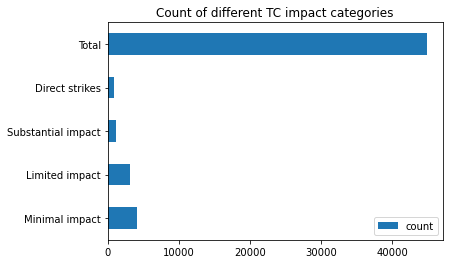

In [10]:
low_impact_count = pd.value_counts(dataset_tsnv['LOW_IMPACT'])[1]
print(low_impact_count)
mid_impact_count = pd.value_counts(dataset_tsnv['MID_IMPACT'])[1]
print(mid_impact_count)
big_impact_count = pd.value_counts(dataset_tsnv['BIG_IMPACT'])[1]
print(big_impact_count)
direct_strike_count = pd.value_counts(dataset_tsnv['DIRECT_STRIKE'])[1]
print(direct_strike_count)

fig, ax = plt.subplots()
df = pd.DataFrame([low_impact_count, mid_impact_count, big_impact_count, direct_strike_count, dataset_tsnv.shape[0]])
df = df.rename(index={0:'Minimal impact', 1:'Limited impact', 2:'Substantial impact', 3:'Direct strikes', 4:'Total'}, columns={0: 'count'})
df.plot(ax=ax, kind='barh', title='Count of different TC impact categories')

In [8]:
subset = dataset_tsnv.query("DIRECT_STRIKE==True")
print(subset.iloc[92])

LOW_IMPACT            False
MID_IMPACT            False
BIG_IMPACT             True
DIRECT_STRIKE          True
MM00                      9
                    ...    
DIST24           397.625846
AZM24             127.26382
SPEED24                   4
DIR24                   287
VMAX24                  100
Name: 3203, Length: 68, dtype: object


In [12]:
all_clear = dataset_tsnv.query("LOW_IMPACT == False and MID_IMPACT == False and BIG_IMPACT == False and DIRECT_STRIKE == False")
print(len(all_clear))
print(len(dataset_tsnv) - len(all_clear))
print((len(dataset_tsnv) - len(all_clear))/len(dataset_tsnv))

39618
5219
0.11639940227936749


### TSNV 2006

In [3]:
dataset = pd.read_pickle('baseline_dataset_tsnv_2006_24.gz')
pd.set_option("display.max.columns", None)
dataset.head()

,LOW_IMPACT,MID_IMPACT,BIG_IMPACT,DIRECT_STRIKE,MM00,DD00,HH00,MI_STATUS00,LI_STATUS00,SI_STATUS00,DS_STATUS00,DIST00,AZM00,SPEED00,DIR00,VMAX00,DVMAX00,MM06,DD06,HH06,MI_STATUS06,LI_STATUS06,SI_STATUS06,DS_STATUS06,DIST06,AZM06,SPEED06,DIR06,VMAX06,DVMAX06,MM12,DD12,HH12,MI_STATUS12,LI_STATUS12,SI_STATUS12,DS_STATUS12,DIST12,AZM12,SPEED12,DIR12,VMAX12,DVMAX12,MM18,DD18,HH18,MI_STATUS18,LI_STATUS18,SI_STATUS18,DS_STATUS18,DIST18,AZM18,SPEED18,DIR18,VMAX18,DVMAX18,MM24,DD24,HH24,MI_STATUS24,LI_STATUS24,SI_STATUS24,DS_STATUS24,DIST24,AZM24,SPEED24,DIR24,VMAX24
0,False,False,False,False,3,5,0,False,False,False,False,3092.902442,119.494060,4,314,35,0,3,4,18,False,False,False,False,3123.767172,119.590258,6,348,35,0,3,4,12,False,False,False,False,3149.860015,120.269948,6,347,35,0,3,4,6,False,False,False,False,3180.884739,121.396302,1,330,35,5,3,4,0,False,False,False,False,3199.215912,122.178629,3,3,30
1,False,False,False,False,3,5,6,False,False,False,False,3066.045665,119.870114,2,313,35,0,3,5,0,False,False,False,False,3092.902442,119.494060,4,314,35,0,3,4,18,False,False,False,False,3123.767172,119.590258,6,348,35,0,3,4,12,False,False,False,False,3149.860015,120.269948,6,347,35,0,3,4,6,False,False,False,False,3180.884739,121.396302,1,330,35
2,False,False,False,False,3,5,12,False,False,False,False,3043.581651,120.728619,3,152,35,0,3,5,6,False,False,False,False,3066.045665,119.870114,2,313,35,0,3,5,0,False,False,False,False,3092.902442,119.494060,4,314,35,0,3,4,18,False,False,False,False,3123.767172,119.590258,6,348,35,0,3,4,12,False,False,False,False,3149.860015,120.269948,6,347,35
3,False,False,False,False,3,5,18,False,False,False,False,3057.474122,122.151350,9,191,25,-10,3,5,12,False,False,False,False,3043.581651,120.728619,3,152,35,0,3,5,6,False,False,False,False,3066.045665,119.870114,2,313,35,0,3,5,0,False,False,False,False,3092.902442,119.494060,4,314,35,0,3,4,18,False,False,False,False,3123.767172,119.590258,6,348,35
4,False,False,False,False,3,6,0,False,False,False,False,3085.423043,124.194192,12,216,25,0,3,5,18,False,False,False,False,3057.474122,122.151350,9,191,25,-10,3,5,12,False,False,False,False,3043.581651,120.728619,3,152,35,0,3,5,6,False,False,False,False,3066.045665,119.870114,2,313,35,0,3,5,0,False,False,False,False,3092.902442,119.494060,4,314,35


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7998 entries, 0 to 7997
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LOW_IMPACT     7998 non-null   bool   
 1   MID_IMPACT     7998 non-null   bool   
 2   BIG_IMPACT     7998 non-null   bool   
 3   DIRECT_STRIKE  7998 non-null   bool   
 4   MM00           7998 non-null   int32  
 5   DD00           7998 non-null   int32  
 6   HH00           7998 non-null   int32  
 7   MI_STATUS00    7998 non-null   bool   
 8   LI_STATUS00    7998 non-null   bool   
 9   SI_STATUS00    7998 non-null   bool   
 10  DS_STATUS00    7998 non-null   bool   
 11  DIST00         7998 non-null   float64
 12  AZM00          7998 non-null   float64
 13  SPEED00        7998 non-null   int32  
 14  DIR00          7998 non-null   int32  
 15  VMAX00         7998 non-null   int32  
 16  DVMAX00        7998 non-null   int32  
 17  MM06           7998 non-null   int32  
 18  DD06    

856
543
215
162


<AxesSubplot:title={'center':'Count of different TC impact categories'}>

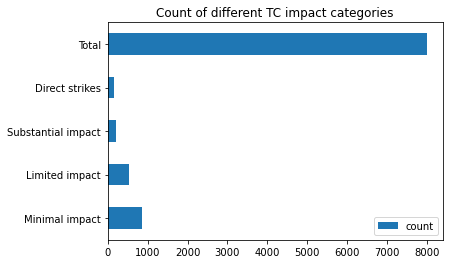

In [4]:
low_impact_count = pd.value_counts(dataset['LOW_IMPACT'])[1]
print(low_impact_count)
mid_impact_count = pd.value_counts(dataset['MID_IMPACT'])[1]
print(mid_impact_count)
big_impact_count = pd.value_counts(dataset['BIG_IMPACT'])[1]
print(big_impact_count)
direct_strike_count = pd.value_counts(dataset['DIRECT_STRIKE'])[1]
print(direct_strike_count)

fig, ax = plt.subplots()
df = pd.DataFrame([low_impact_count, mid_impact_count, big_impact_count, direct_strike_count, dataset.shape[0]])
df = df.rename(index={0:'Minimal impact', 1:'Limited impact', 2:'Substantial impact', 3:'Direct strikes', 4:'Total'}, columns={0: 'count'})
df.plot(ax=ax, kind='barh', title='Count of different TC impact categories')

In [13]:
all_clear = dataset.query("LOW_IMPACT == False and MID_IMPACT == False and BIG_IMPACT == False and DIRECT_STRIKE == False")
print(len(all_clear))
print(len(dataset) - len(all_clear))
print((len(dataset) - len(all_clear))/len(dataset))

7097
901
0.1126531632908227


### Experimental dataset for comparison

In [12]:
exp_dataset = pd.read_pickle('../experimental_datasets/experimental_dataset_tsnv_24.gz')
pd.set_option("display.max.columns", None)
exp_dataset.head()

,LOW_IMPACT,MID_IMPACT,BIG_IMPACT,DIRECT_STRIKE,MM00,DD00,MI_STATUS00,LI_STATUS00,SI_STATUS00,DS_STATUS00,DIST00,AZM00,SPEED00,DIR00,VMAX00,DVMAX00,ULVWS00,MLVWS00,HI_HUMID00,LO_HUMID00,STEMP00,UTEMP00,U_HK00,V_HK00,U20000,U50000,V50000,EASM00,VORT00,WESTERLY00,SH_AREA00,SH_INT00,SH_EXT00,POTT00,MM06,DD06,MI_STATUS06,LI_STATUS06,SI_STATUS06,DS_STATUS06,DIST06,AZM06,SPEED06,DIR06,VMAX06,DVMAX06,ULVWS06,MLVWS06,HI_HUMID06,LO_HUMID06,STEMP06,UTEMP06,U_HK06,V_HK06,U20006,U50006,V50006,EASM06,VORT06,WESTERLY06,SH_AREA06,SH_INT06,SH_EXT06,POTT06,MM12,DD12,MI_STATUS12,LI_STATUS12,SI_STATUS12,DS_STATUS12,DIST12,AZM12,SPEED12,DIR12,VMAX12,DVMAX12,ULVWS12,MLVWS12,HI_HUMID12,LO_HUMID12,STEMP12,UTEMP12,U_HK12,V_HK12,U20012,U50012,V50012,EASM12,VORT12,WESTERLY12,SH_AREA12,SH_INT12,SH_EXT12,POTT12,MM18,DD18,MI_STATUS18,LI_STATUS18,SI_STATUS18,DS_STATUS18,DIST18,AZM18,SPEED18,DIR18,VMAX18,DVMAX18,ULVWS18,MLVWS18,HI_HUMID18,LO_HUMID18,STEMP18,UTEMP18,U_HK18,V_HK18,U20018,U50018,V50018,EASM18,VORT18,WESTERLY18,SH_AREA18,SH_INT18,SH_EXT18,POTT18,MM24,DD24,MI_STATUS24,LI_STATUS24,SI_STATUS24,DS_STATUS24,DIST24,AZM24,SPEED24,DIR24,VMAX24,ULVWS24,MLVWS24,HI_HUMID24,LO_HUMID24,STEMP24,UTEMP24,U_HK24,V_HK24,U20024,U50024,V50024,EASM24,VORT24,WESTERLY24,SH_AREA24,SH_INT24,SH_EXT24,POTT24
0,False,False,False,False,1,14,False,False,False,False,1108.140101,182.684092,12,247,40,5,0.0,0.0,49.180557,49.180557,272.87500,225.08333,18.4452,26.061701,53.363194,53.363194,12.060417,36.532387,90.75,416.56293,0,0.0000,0,271.95000,1,14,False,False,False,False,1054.488536,175.697325,12,248,35,5,0.0,0.0,49.180557,49.180557,272.87500,225.08333,18.4452,26.061701,53.363194,53.363194,12.060417,36.532387,90.75,416.56293,0,0.0000,0,271.95000,1,13,False,False,False,False,1025.809285,168.831691,11,252,30,0,0.0,0.0,49.180557,49.180557,272.87500,225.08333,18.4452,26.061701,53.363194,53.363194,12.060417,36.532387,90.75,416.56293,0,0.0000,0,271.95000,1,13,False,False,False,False,1019.088182,162.463138,10,276,30,5,0.0,0.0,49.180557,49.180557,272.87500,225.08333,18.4452,26.061701,53.363194,53.363194,12.060417,36.532387,90.75,416.56293,0,0.0000,0,271.95000,1,13,False,False,False,False,1110.394048,157.346520,11,314,25,0.0,0.0,49.180557,49.180557,272.87500,225.08333,18.4452,26.061701,53.363194,53.363194,12.060417,36.532387,90.75,416.56293,0,0.0000,0,271.95000
1,False,False,False,False,1,14,False,False,False,False,1172.821661,187.920127,12,224,35,-5,0.0,0.0,59.215280,59.215280,263.75000,224.53334,22.7799,25.313200,51.670834,51.670834,15.001389,35.627434,87.25,405.20620,0,0.0000,0,271.00000,1,14,False,False,False,False,1108.140101,182.684092,12,247,40,5,0.0,0.0,59.215280,59.215280,263.75000,224.53334,22.7799,25.313200,51.670834,51.670834,15.001389,35.627434,87.25,405.20620,0,0.0000,0,271.00000,1,14,False,False,False,False,1054.488536,175.697325,12,248,35,5,0.0,0.0,59.215280,59.215280,263.75000,224.53334,22.7799,25.313200,51.670834,51.670834,15.001389,35.627434,87.25,405.20620,0,0.0000,0,271.00000,1,13,False,False,False,False,1025.809285,168.831691,11,252,30,0,0.0,0.0,59.215280,59.215280,263.75000,224.53334,22.7799,25.313200,51.670834,51.670834,15.001389,35.627434,87.25,405.20620,0,0.0000,0,271.00000,1,13,False,False,False,False,1019.088182,162.463138,10,276,30,0.0,0.0,59.215280,59.215280,263.75000,224.53334,22.7799,25.313200,51.670834,51.670834,15.001389,35.627434,87.25,405.20620,0,0.0000,0,271.00000
2,False,False,False,False,1,14,False,False,False,False,1337.412594,190.330576,13,203,30,-5,0.0,0.0,67.784720,67.784720,260.07498,223.30972,21.4434,28.030500,46.818054,46.818054,11.184722,35.374070,101.00,397.72840,0,0.0000,0,273.72500,1,14,False,False,False,False,1172.821661,187.920127,12,224,35,-5,0.0,0.0,67.784720,67.784720,260.07498,223.30972,21.4434,28.030500,46.818054,46.818054,11.184722,35.374070,101.00,397.72840,0,0.0000,0,273.72500,1,14,False,False,False,False,1108.140101,182.684092,12,247,40,5,0.0,0.0,67.784720,67.784720,260.07498,223.30972,21.4434,28.030500,46.818054,46.818054,11

In [13]:
exp_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6955 entries, 0 to 6954
Columns: 153 entries, LOW_IMPACT to POTT24
dtypes: bool(24), float64(90), int32(29), int64(10)
memory usage: 6.2 MB


729
495
205
134


<AxesSubplot:title={'center':'Count of different TC impact categories'}>

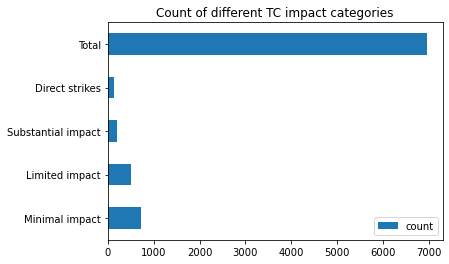

In [16]:
low_impact_count = pd.value_counts(exp_dataset['LOW_IMPACT'])[1]
print(low_impact_count)
mid_impact_count = pd.value_counts(exp_dataset['MID_IMPACT'])[1]
print(mid_impact_count)
big_impact_count = pd.value_counts(exp_dataset['BIG_IMPACT'])[1]
print(big_impact_count)
direct_strike_count = pd.value_counts(exp_dataset['DIRECT_STRIKE'])[1]
print(direct_strike_count)

fig, ax = plt.subplots()
df = pd.DataFrame([low_impact_count, mid_impact_count, big_impact_count, direct_strike_count, exp_dataset.shape[0]])
df = df.rename(index={0:'Minimal impact', 1:'Limited impact', 2:'Substantial impact', 3:'Direct strikes', 4:'Total'}, columns={0: 'count'})
df.plot(ax=ax, kind='barh', title='Count of different TC impact categories')

In [17]:
all_clear = exp_dataset.query("LOW_IMPACT == False and MID_IMPACT == False and BIG_IMPACT == False and DIRECT_STRIKE == False")
print(len(all_clear))
print(len(exp_dataset) - len(all_clear))
print((len(exp_dataset) - len(all_clear))/len(exp_dataset))

6182
773
0.1111430625449317


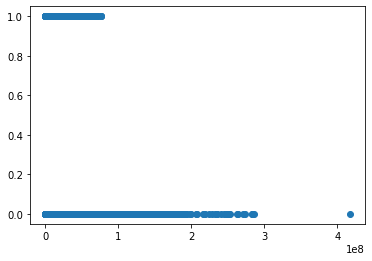

In [18]:
y = exp_dataset["LOW_IMPACT"].to_numpy(dtype=int)
x = exp_dataset["DIST00"].mul(exp_dataset["AZM00"].mul(exp_dataset["DIR00"]))
plt.scatter(x, y)